# Prediction of deaths due to Heart Failures

In today's world, Cardiovascular diseases (CVDs) are one of the most common causes of death.It is a class of diseases that involve the heart or blood vessels.Together CVD resulted in 17.9 million deaths (32.1%) in 2015, up from 12.3 million (25.8%) in 1990. Deaths, at a given age, from CVD are more common and have been increasing in much of the developing world, while rates have declined in most of the developed world since the 1970s. Coronary artery disease and stroke account for 80% of CVD deaths in males and 75% of CVD deaths in females. Most cardiovascular disease affects older adults. In the United States 11% of people between 20 and 40 have CVD, while 37% between 40 and 60, 71% of people between 60 and 80, and 85% of people over 80 have CVD. The average age of death from coronary artery disease in the developed world is around 80 while it is around 68 in the developing world. Diagnosis of disease typically occurs seven to ten years earlier in men as compared to women. Amongst all types of CVDs, heart failure is one of the most common effect observed. Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol using population-wide strategies.People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.


- The data that I have used contains 12 features that can be used to predict mortality by heart failure.
- This project is a binary classification problem.
- We will predict the Heart Failures using different models (our target variable being Death_Event).
- Target variable is the variable that is or should be the output. In our study our target variable is Death Event in the contex of determining whether anybody is likely to die due to heart failures based on the input parameters like gender, age and various test results or not.
- Lastly, we will build a variety of Classification models and compare the models giving the best prediction on Heart Failures.

# Contents:
- Libraries
- Data Load
- Data Pre-processing and Cleaning
- EDA and Feature Engineering
- Model Section and Training
- Hyper parameter Tuning
- Final Model
- Results and Conclusion

# 1. Libraries

All the libraries required for the script are imported below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
import plotly.express as px
import shap
import xgboost as xgb

In [2]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.experimental import enable_halving_search_cv
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold, cross_val_score, cross_validate
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, mutual_info_score
from sklearn.metrics import roc_curve,confusion_matrix, ConfusionMatrixDisplay,auc, RocCurveDisplay


# 2. Load the data

In [3]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df = pd.DataFrame(data)
df

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

# 3. Data Pre-processing and Cleaning

#### Dataset size

In [4]:
df.shape

(299, 13)

#### Dataset Columns

In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

#### We extract the first 5 rows of the dataset using the head() function.

In [6]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

#### We extract the last 5 rows of the dataset using the tail() function.

In [7]:
df.tail()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
294                    1   155000.0               1.1           143    1   
295                    0   270000.0               1.2           139    0   
296                    0   742000.0               0.8           138    0   
297                    0   140000.0               1.4           140    1   
298                    0   395000.0               1.6           136    1   

     smoking  time  DEATH_EVENT  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0

#### Next, we extract the information from our dataset using the describe() function.

In our dataset the attributes: anaemia, diabetes, high_blood_pressure, sex, smoking and DEATH_EVENT are qualitative variables. 
The rest are quantitative variables.
Age attribute/variable is distributed between 40 to 95.

In [8]:
df.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [9]:
print("There are", df.shape[0], "observations and", df.shape[1], "columns in the dataset respectively.")

There are 299 observations and 13 columns in the dataset respectively.


## 4. Exploratory Data Analysis (EDA) and Feature Engineering

In EDA, we will analyze the dataset to summarize the main characteristics and variables present in it. We have used statistical graphics and some data visualization methods to do so. 
The following topics have been covered under EDA:
- Check for missing values.
- Check for duplicate values.
- Check the uniques values and their ranges for each object feature.
- Print concise summary of dataset.
- Plot graphs for each attribute.
- Feature engineering: Check for good features through Correlation matrix.
- Do some target feature analysis.
- Identify our target variable : DEATH_EVENT
- Detailed analysis of target variable/attribute.

#### Firstly, we check for any missing values in the dataset.
There are no missing values found.

In [10]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### Next, we check for any duplicate values and their sums in the dataset.
There are zero duplicate values found.

In [11]:
df.duplicated().sum()

0

#### Next, we check how many unique values object features contain.

In [12]:
for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique values.")

age has 47 unique values.
anaemia has 2 unique values.
creatinine_phosphokinase has 208 unique values.
diabetes has 2 unique values.
ejection_fraction has 17 unique values.
high_blood_pressure has 2 unique values.
platelets has 176 unique values.
serum_creatinine has 40 unique values.
serum_sodium has 27 unique values.
sex has 2 unique values.
smoking has 2 unique values.
time has 148 unique values.
DEATH_EVENT has 2 unique values.


#### Next, we print a concise summary of the dataset. 
 The info() function prints information about the index dtype and column dtypes, non-null values and memory usage.
 Here in this case the size of the data set is (299,13) which means it has 299 entries and 13 columns respectively.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


#### Plotting graphs for each of the attributes of the dataset,
 - age
 - anaemia
 - creatinine_phosphokinase
 - diabetes
 - ejection_fraction
 - high blood pressure
 - platelets
 - serum creatinine
 - serum_sodium
 - sex
 - smoking
 - time
 - death event


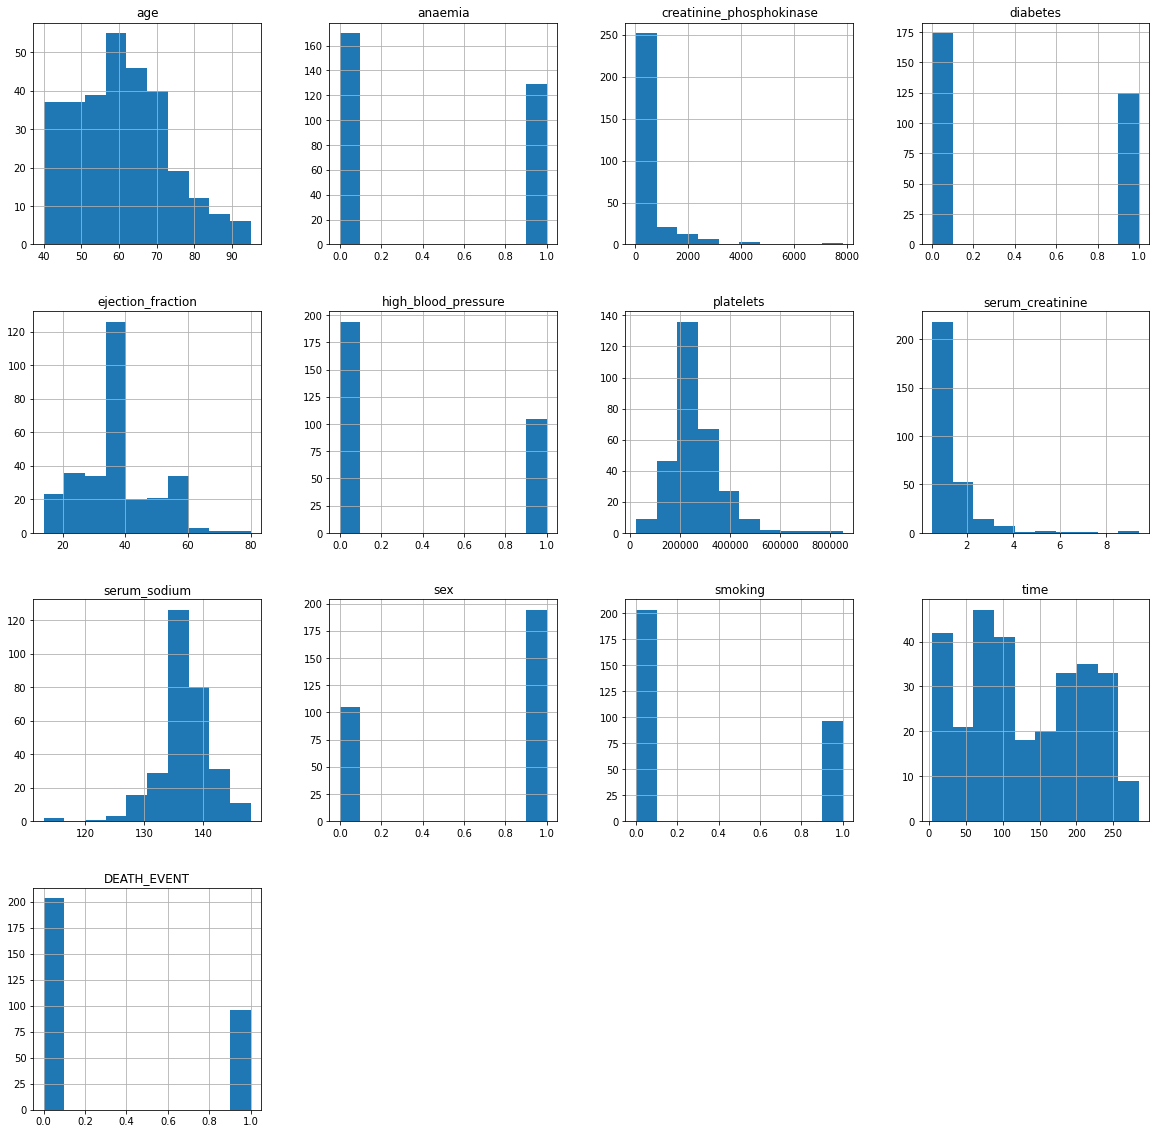

In [14]:
df.hist(figsize = (20,20))

plt.show()

###  Features Engineering : Correlation Matrix
A correlation matrix is a table which depicts the correlation coefficients between attributes of dataset. Here, we will plot a matrix to depict the various correlation factors amongst our dataset attributes.

From the heatmap below, we can see that the three features most correlated (both positvely and negatively) with a patient's survival outcome (DEATH_EVENT) namely: ejection fraction, serum_creatinine and time. Therefore, while splitting the data into a train and test set, we can explicitly select the mentioned three features instead of the complete dataset.

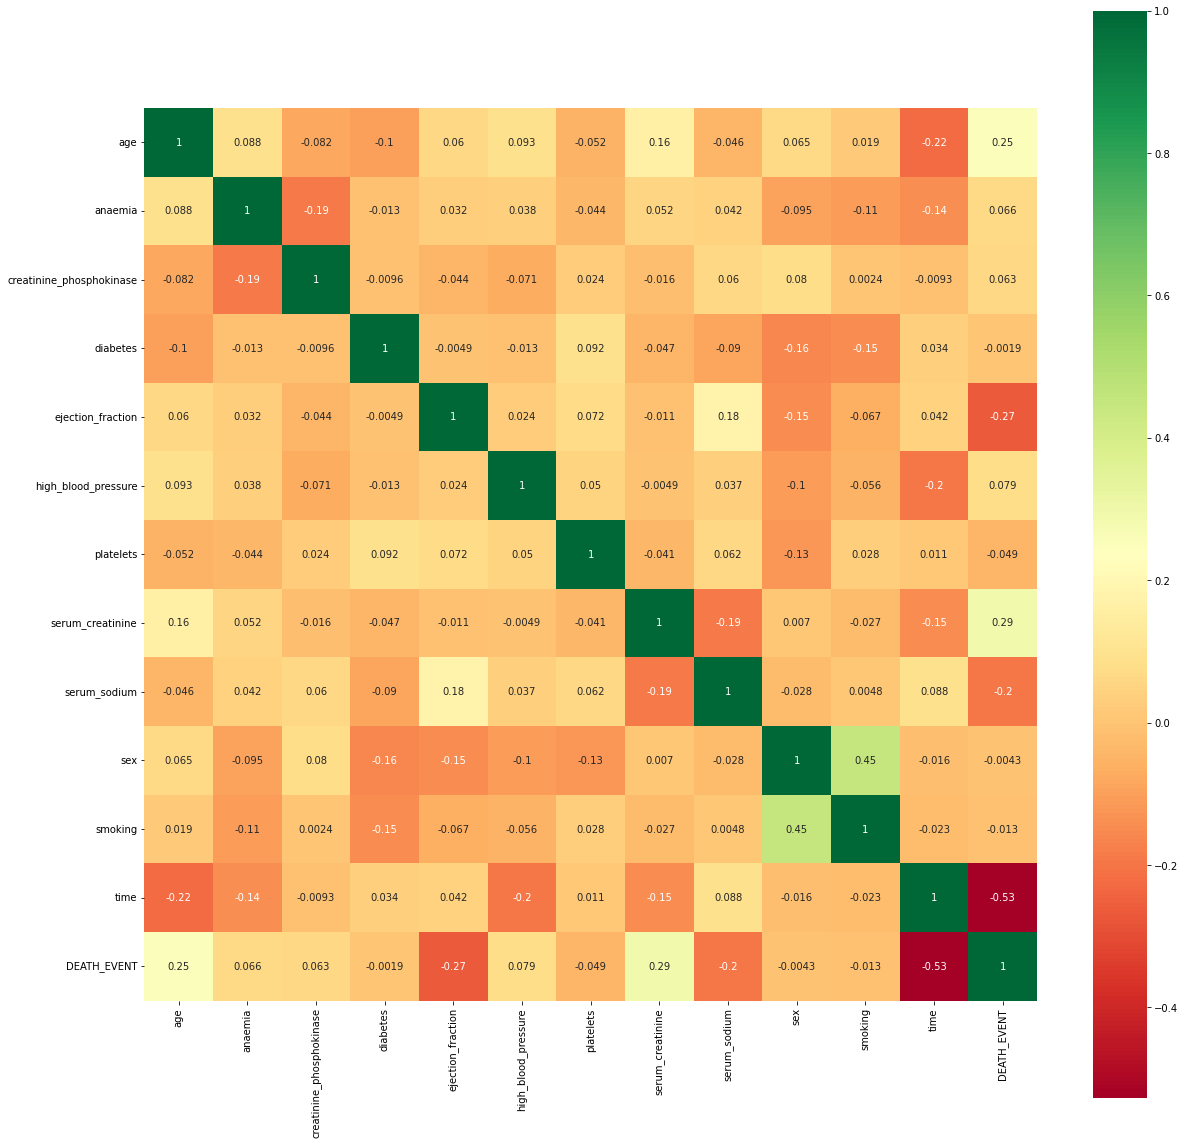

In [15]:
plt.figure(figsize=(20,20))
data=df
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True)

#### Taking two attributes(Diabetes and Age) and having a closer look at their plots. Below is a scatter plot which depicts the correlation between their data.

<AxesSubplot:xlabel='diabetes', ylabel='age'>

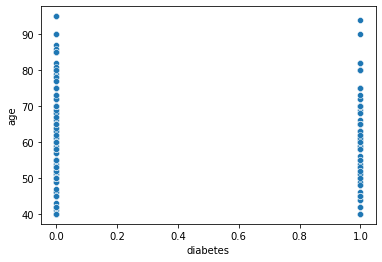

In [16]:
sns.scatterplot(x=df['diabetes'], y=df['age'])

#### Next, we will plot a regression graph between the two attributes(Diabetes and Age)

<AxesSubplot:xlabel='diabetes', ylabel='age'>

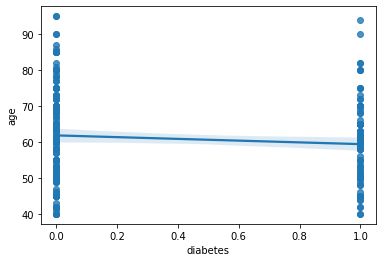

In [17]:
sns.regplot(x=df['diabetes'], y=df['age'])

#### Death cases with respect to Age attribute are plotted below.

The median for the 'Age' attribute is found to be around 60.

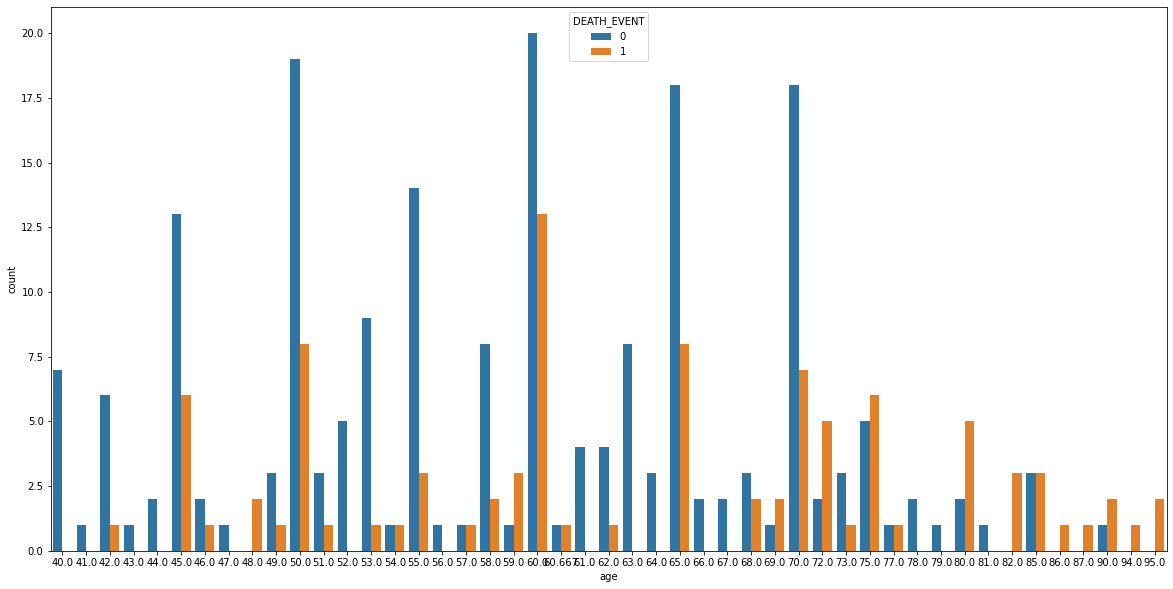

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(x ="age", data=df, hue ="DEATH_EVENT");

#### Death Cases with respect to Sex attribute are plotted below.

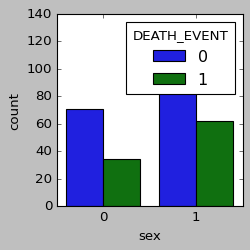

In [19]:
plt.style.use("classic")
plt.figure(figsize=(3,3))
sns.countplot(x ="sex", data=df, hue ="DEATH_EVENT");

#### Next, we check the true and false counts for DEATH_EVENT.

We found that we have approximately 67% True values count and 32% False values count.

In [20]:
counts=df['DEATH_EVENT'].value_counts(normalize=True)
counts

0    0.67893
1    0.32107
Name: DEATH_EVENT, dtype: float64

#### Next, we check the true and false counts for SEX.

We found that we have approximately 64% True values count and 35% False values count.

In [21]:
counts=df["sex"].value_counts(normalize=True)
counts

1    0.648829
0    0.351171
Name: sex, dtype: float64

#### Next, we will check the percentage of the females and males that have survived and are dead and plot it.

Text(0.5, 0.98, "'DEATH_EVENT'")

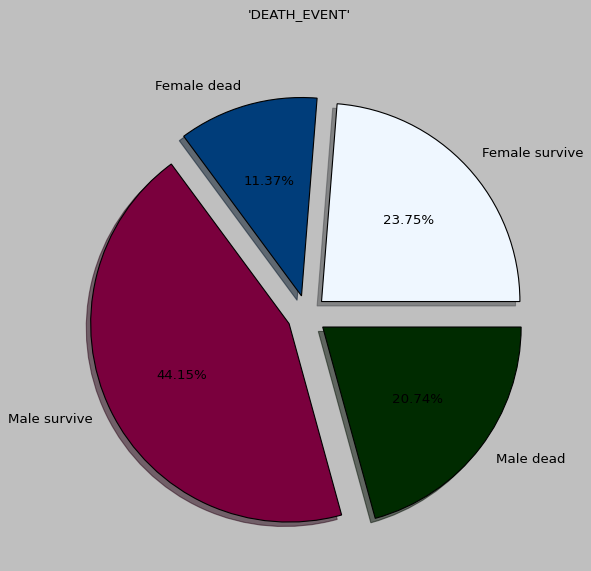

In [22]:
female_survive=df.age[(df.sex==0) & (df.DEATH_EVENT==0)].count()
male_survive=df.age[(df.sex==1) & (df.DEATH_EVENT==0)].count()
female_dead=df.age[(df.sex==0) & (df.DEATH_EVENT==1)].count()
male_dead=df.age[(df.sex==1) & (df.DEATH_EVENT==1)].count()


df=[female_survive,female_dead,male_survive,male_dead]
label=["Female survive","Female dead","Male survive","Male dead"]
explde=[0.1,0.1,0.1,0.1]
colors = ['#eff7ff','#003d7a','#7a003d','#002b00']
plt.figure(figsize=(8,8))
plt.pie(x=df,labels=label,autopct="%1.2f%%",shadow=True,explode=explde,colors=colors)
plt.suptitle("'DEATH_EVENT'")

#### Examining the target variable : Death_Event

In [23]:
data['DEATH_EVENT'].describe()


count    299.00000
mean       0.32107
std        0.46767
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: DEATH_EVENT, dtype: float64

#### Next, we print the total count of the Death_Event attribute and plot it.

0    203
1     96
Name: DEATH_EVENT, dtype: int64


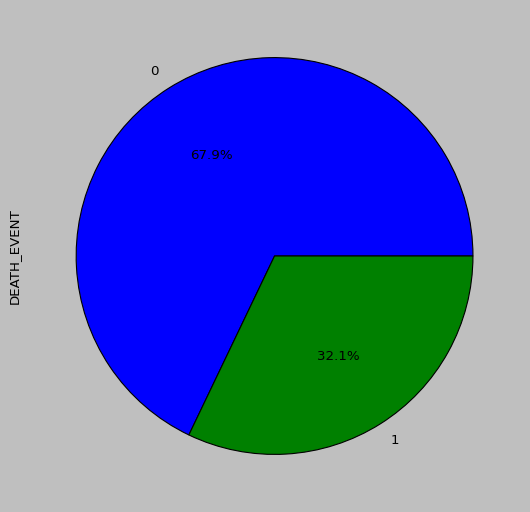

In [24]:
print(data["DEATH_EVENT"].value_counts())
data["DEATH_EVENT"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(8,9));

#### Now, we will check the categorical and numerical columns for the dataset.

In [25]:
categorical_cols = data.loc(axis=1)['anaemia','diabetes','high_blood_pressure','sex','smoking','DEATH_EVENT']
numerical_cols = data.loc(axis=1)['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']

#### Categorical Columns :

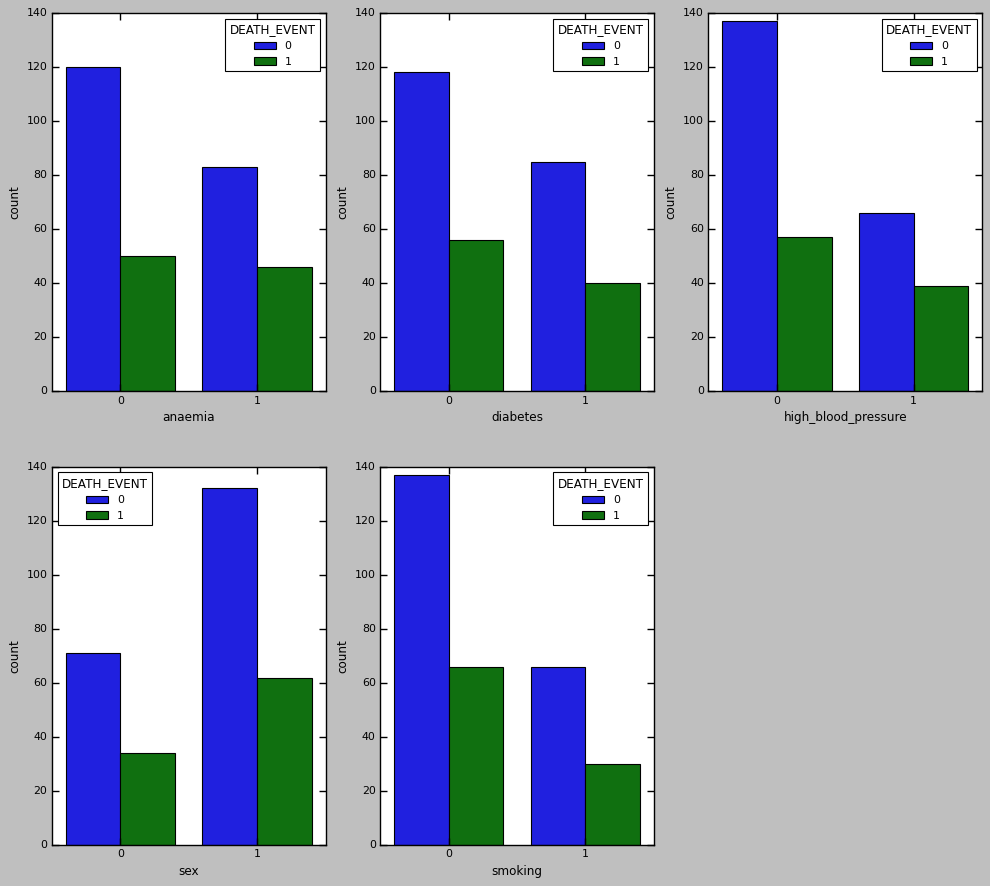

In [26]:
sns.set_context("notebook", font_scale=0.90)

fig, ax = plt.subplots(2,3, figsize=(15,13))
[sns.countplot(data=data,x=cat, hue="DEATH_EVENT", ax=ax.flatten()[i]) 
 for i,cat in enumerate(categorical_cols.drop('DEATH_EVENT',axis=1))]
ax.flatten()[-1].set_visible(False) # Remove the 6th empty plot
[y_ax.set_ylim(0,140) for y_ax in ax.flatten()]
plt.show()

In [27]:
seaborn_cols = ['#6a3fa0 ', '#d88138']
fig = px.parallel_categories(categorical_cols, color="DEATH_EVENT", color_continuous_scale=seaborn_cols)
fig.show()

#### Analysis of Categorical Data:
- Those having a high blood pressure have an increased risk of death. This is so because ususally hypertension is a major risk factor for heart failure.
- Those having Anaemia is associated with increased risk of death. Again, this is so because anaemia is a common comorbidity of heart failure.

#### Numerical Columns :

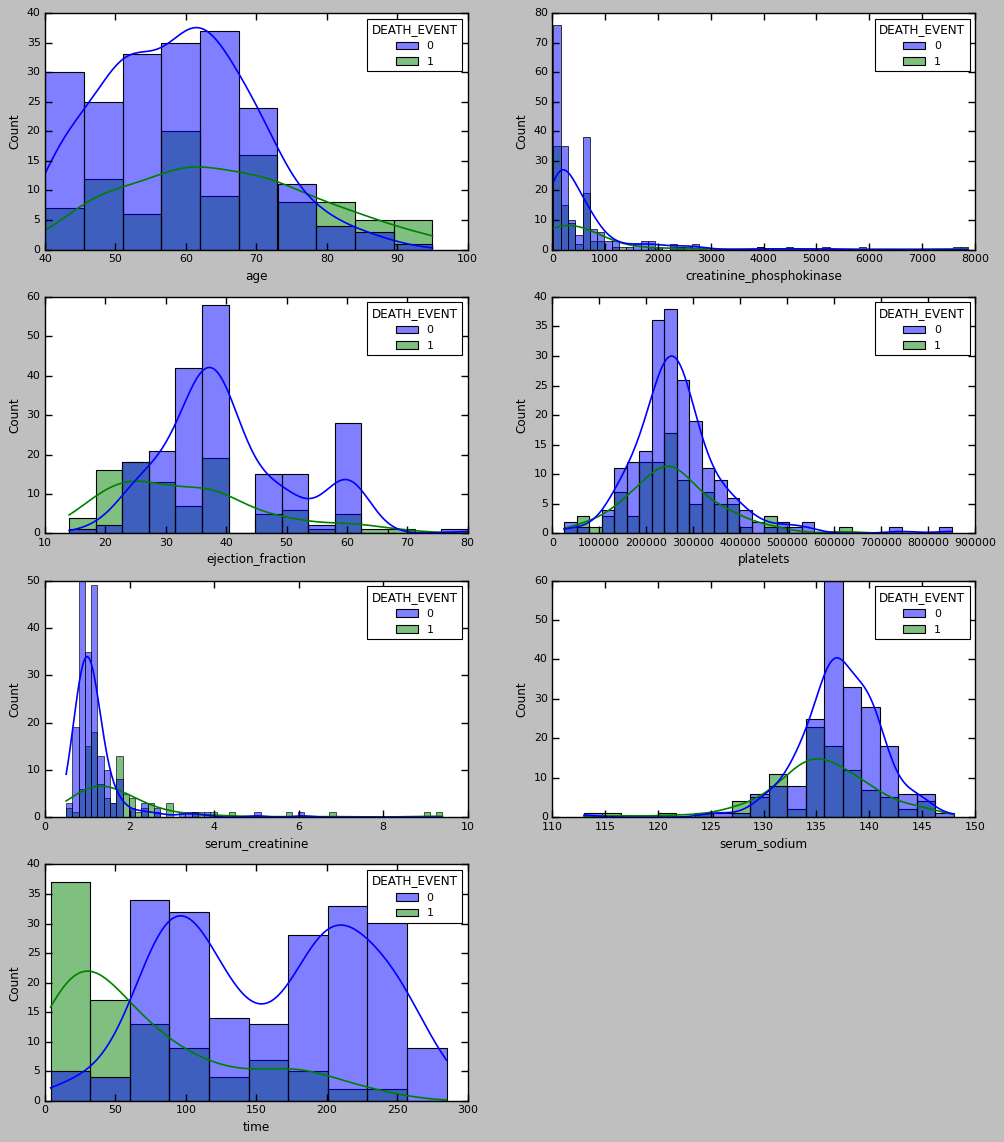

In [28]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15,17))
[sns.histplot(data=data, x=num, hue="DEATH_EVENT", kde=True, ax=ax.flatten()[i]) for i,num in enumerate(numerical_cols)]
ax.flatten()[-1].set_visible(False)
plt.show()

#### Analysis of Numerical Data:


- A low value for time is highly correlated with death. This is due to the follow up period being cut short due to death of the patient. It is obvious however, that the number of days is not what killed the patient, it is merely that the number of days are cut short in those who were lost to follow up due to death. In this sense time is not a clinically useful variable for screening patients.
- Elevated serum_creatinine appears to indicate inreased death.
- A lower ejection fraction seems to have some correlation with increased death. This seems reasonable as typically a low stroke volume is associated with congestinve heart failure. Stroke volume, along with end diastolic volume make up the equation for ejection fraction. 
- Increased age appears to play a slight role in increased death.
- Creatinine_phosphokinase, platelets, and serum_sodium do not appear to have any significant influence in predicting patient outcome.

#### Next we will do some analysis on the target variable (Death_Event).

We will print the percentages of the death event and not situations.

In [29]:
y = data['DEATH_EVENT']
print(f'Percentage of DEATH EVENT: % {round(y.value_counts(normalize=True)[1]*100,2)} --> \
({y.value_counts()[1]} cases for DEATH EVENT)\nPercentage of NOT DEATH EVENT: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} cases for NOT Heart Disease)')

Percentage of DEATH EVENT: % 32.11 --> (96 cases for DEATH EVENT)
Percentage of NOT DEATH EVENT: % 67.89 --> (203 cases for NOT Heart Disease)


In [30]:
data[data['DEATH_EVENT']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

# 5. Model Selection and Training
#### Now we move on to next step, the selection of different models and their respective training processes.
#### We will start with feature scaling. In this process we basically normalize the range of independent features of data.

In [31]:
scaler = StandardScaler()

df_scaled = data.copy()
df_scaled.loc(axis=1)[numerical_cols.columns] = scaler.fit_transform(data.loc(axis=1)[numerical_cols.columns]) 

#### Next, we will do some Model comparison using Repeated Stratified K-Fold Cross Validation.

Repeated k-fold cross-validation is a method used to improve the estimated performance of a machine learning model. This involves repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs.

We have considered the following models:
- Logistic Regression
- Random Forest Classifier
- XGBoost Classifier
- Gradient Boost Classifier
- SVC
- Quadratic Discriminant Analysis


According to the range of independent features, training accuracy  and test scores we will decide which models to use for our further training and analysis.

In [32]:
RANDOM_STATE = 2 #Random state ensures that the splits we are tryin to generate are reproducible.

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RANDOM_STATE)

feat_set = ['Leakage', 'Baseline']

# creating a list of models to evaluate.
models = [LogisticRegression(), 
          RandomForestClassifier(random_state=RANDOM_STATE), 
          XGBClassifier(verbosity=0, use_label_encoder = False, 
                        random_state=RANDOM_STATE, eval_metric='logloss'),
          GradientBoostingClassifier(random_state=RANDOM_STATE),
          SVC(kernel='sigmoid'),
          QuadraticDiscriminantAnalysis()]

model_names = [mod.__class__.__name__ for mod in models]

mod_cols = ['Name', 
            'Parameters',
            'Time']

df_mod = pd.DataFrame(columns=mod_cols)

for i in range(len(feat_set)):

    # Target variable feature considered.
    
    if (i==0):
        X = df_scaled.drop('DEATH_EVENT',axis=1)
    else:
        X = df_scaled.drop(['time','DEATH_EVENT'],axis=1)

     
    y = df_scaled['DEATH_EVENT']
    
    for j,model in enumerate(models):

        # Now, evaluating the models below.
        cv_results = cross_validate(model, X, y, cv=cv, scoring="f1", return_train_score = True)
        df_mod.loc[j + len(models)*i , 'Parameters'] = str(model.get_params())
        df_mod.loc[j + len(models)*i, 'Name'] = model.__class__.__name__
        df_mod.loc[j + len(models)*i, 'Time'] = cv_results['fit_time'].mean()
        df_mod.loc[j + len(models)*i, 'Train Accuracy'] = cv_results['train_score'].mean()
        df_mod.loc[j + len(models)*i, 'Test Score'] = cv_results['test_score'].mean()
        df_mod.loc[j + len(models)*i, 'feat_set'] = feat_set[i]

In [33]:
df_mod.loc(axis=1)['Name','Train Accuracy','Test Score','feat_set'].sort_values('Test Score', ascending=False)

Name  Train Accuracy  Test Score  feat_set
1          RandomForestClassifier        1.000000    0.731964   Leakage
4                             SVC        0.676040    0.724766   Leakage
3      GradientBoostingClassifier        0.998645    0.720331   Leakage
2                   XGBClassifier        1.000000    0.718654   Leakage
0              LogisticRegression        0.751825    0.716109   Leakage
8                   XGBClassifier        1.000000    0.541325  Baseline
7          RandomForestClassifier        1.000000    0.540639  Baseline
9      GradientBoostingClassifier        0.938224    0.536325  Baseline
5   QuadraticDiscriminantAnalysis        0.649007    0.518583   Leakage
6              LogisticRegression        0.565785    0.514828  Baseline
10                            SVC        0.428913    0.463668  Baseline
11  QuadraticDiscriminantAnalysis        0.503381    0.332839  Baseline

In [34]:
fig = px.bar(data_frame = df_mod.sort_values('Test Score', ascending=True),
             x="Name", y="Test Score", color="feat_set", barmode="group",
             color_discrete_sequence=px.colors.qualitative.D3,
             template = "plotly_white")
fig.show()

Now, from above barplot we can see the importance of correct feature selection. The 'time' variable cannot be a feature of the model because it is not available at the time of prediction.
The 'time' variable is a direct result of the death event so to use the time variable in the model would introduce target leakage.

Using an example, let us assume a scenario that a patient goes to a doctor to receive a heart failure prediction. 
The doctor agrees and collects his data to make a prediction using our model. However, when the doctor comes across the time column, he will ponder so as to what to fill in there. If he considers the number of days then the question arises since what time period to consider(the start).
Therefore, the model that we build must be useful and accurate and hence we cannot use time as a feature.

#### From the above plot and results, 
#### XGBoost, Random Forest, and Gradient Boost are the most accurate classifiers for this data using default hyperparameters.
#### Hence,I will consider these three models for further training and analysis.

Our dataset is unbalanced, so we will use Synthetic Minority Oversampling Technique to improve it.

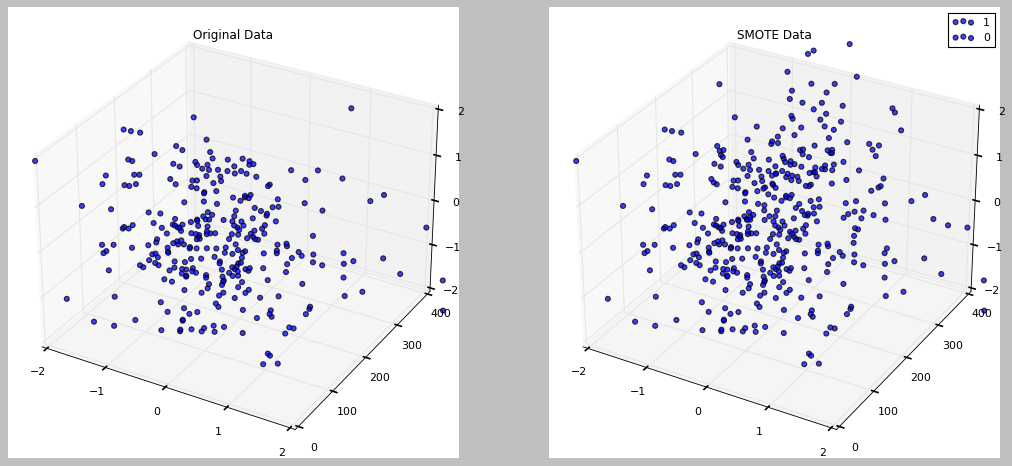

In [35]:
counter = Counter(y) 

# transform the dataset
oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(X, y)
df_sm = X_sm.copy()
df_sm['DEATH_EVENT'] = y_sm
smote_counter = Counter(y_sm)

## Visualise the oversampling 
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax = [ax1, ax2]
for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    ax1.scatter(X.loc(axis=0)[row_ix]["platelets"],
                    [row_ix], 
                    X.loc(axis=0)[row_ix]["age"],
                    label=str(label),
                    alpha=0.75)
                    
for label_sm, _ in smote_counter.items():
    row_ix_sm = np.where(y_sm == label_sm)[0]
    ax2.scatter(X_sm.loc(axis=0)[row_ix_sm]["platelets"], 
                    [row_ix_sm],
                    X_sm.loc(axis=0)[row_ix_sm]["age"],
                    label=str(label_sm), alpha=0.75)

for axi in ax:
    axi.set_zlim(-2,2)
    axi.set_xlim(-2,2)
    axi.set_ylim(0,400)
    axi.set_xticks([-2,-1,0,1,2])
    axi.set_yticks([0,100,200,300,400])
    axi.set_zticks([-2,-1,0,1,2])
    
ax1.set_title("Original Data")
ax2.set_title("SMOTE Data")
plt.legend()
plt.show()

#### Now, we will evaluate the effect of Synthetic Minority Oversampling Technique on all our models.

In [36]:
df_mod_sm = df_mod.copy()

for model in models:

    cv_results = cross_validate(model, X_sm, y_sm, cv=cv, scoring="f1", return_train_score = True)
    
    # Here,adding 1 to the max index instead of appending so I can pass everything as a dict()
    df_mod_sm.loc(axis=0)[df_mod_sm.index.values.max()+1] = {
            'Name':model.__class__.__name__,
            'Parameters':str(model.get_params()),
            'Time':cv_results['fit_time'].mean(),
            'Train Accuracy':cv_results['train_score'].mean(),
            'Test Score':cv_results['test_score'].mean(),
            'feat_set':'SMOTE'
             }

In [37]:
fig = px.bar(data_frame = df_mod_sm.sort_values('Test Score', ascending=True),
             x="Name", y="Test Score", color="feat_set", barmode="group",
             color_discrete_sequence=px.colors.qualitative.D3,
             template = "plotly_white")
fig.show()

#### Here now, selecting appropriate features can result in improvements in model metrics through eliminating noisy features. We will now do some feature importance using permutation.

In [38]:
top_model_names = df_mod_sm.sort_values('feat_set', ascending=False).sort_values('Test Score', ascending=False)['Name'][:3].values
top_models = [m for m in models if m.__class__.__name__ in top_model_names]

# Initialize a DataFrame to contain the importances of each feature for each model
df_imp = pd.DataFrame(index=range(0,len(X_sm.columns)*len(top_models)), columns=['feature','model','importance'])

# len_feat will allow us to populate the features for each model
len_feat = int(len(X_sm.columns))

for i in range(len(top_models)):
    results = permutation_importance(top_models[i].fit(X_sm, y_sm), X_sm, y_sm, scoring="f1", 
                                n_repeats=10, n_jobs=None, 
                                random_state=RANDOM_STATE)   
    df_imp.loc[range(len_feat*i,len_feat*(i+1)),'importance'] = (results['importances_mean'])
    df_imp.loc[range(len_feat*i,len_feat*(i+1)),'model'] = top_models[i].__class__.__name__
    df_imp.loc[range(len_feat*i,len_feat*(i+1)),'feature'] = X_sm.columns

#### After doing the feature importance using different permutations we will plot a graph depicting the results for all our three models:

- XGBClassifier
- Gradient Boost Claissifier
- Random Forest Classifier

In [39]:
fig = px.bar(data_frame=df_imp.sort_values('importance'), 
             x="importance", 
             y="feature", 
             color="model",
             barmode="group",
             orientation="h",
             template = "plotly_white"
             )
fig.show()

#### Next, I am doing feature importance using SHAP (SHapley Additive exPlanations).

SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of a machine learning model. 
It connects optimal credit allocation with local explanations using the classic Shapley values from game theory and their related extensions.
Below we can see the different high and low feature values for all our attributes.


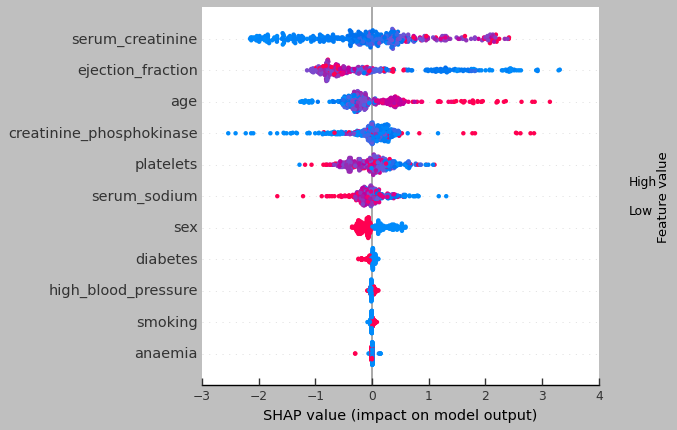

In [40]:
shap.initjs()
explainer = shap.TreeExplainer(top_models[2].fit(X_sm, y_sm))
shap_values = explainer.shap_values(X_sm)
shap.summary_plot(shap_values, features=X_sm, feature_names=X_sm.columns)



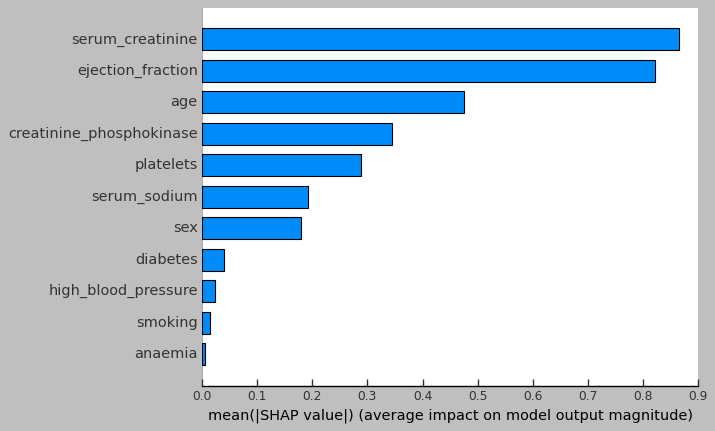

In [41]:
shap.summary_plot(shap_values, features=X_sm, 
                        feature_names=X_sm.columns, 
                        plot_type="bar")

#### From the plots above, it is clear that  'high_bloodpressure', 'smoking', 'diabetes' and, 'anaemia' are the least important features across both methods of determining feature importance (permutation & SHAP).
#### Hence, these will be dropped from the analysis and the following change in performance will be noted.

And next, we will run the models using two feature sets namely:
- mean absolute SHAP value >0.1
- mean absolute SHAP value >0.6

In [42]:
feats = []

df_mod_sm_f = df_mod_sm[df_mod_sm['Name'].isin(top_model_names)].copy()

for j in [1,6]:
    feats.append(X_sm.columns[np.argsort(np.abs(shap_values).mean(0))][::-1][:j+1].values)

for i,feat in enumerate(feats):    
    for model in top_models:
        cv_results = cross_validate(model, X_sm.loc(axis=1)[feat], y_sm, cv=cv, 
                                    scoring="f1", return_train_score = True)

        # Adding 1 to the max index instead of appending so I can pass everything as a dict()
        df_mod_sm_f.loc(axis=0)[df_mod_sm_f.index.values.max()+1] = {
                'Name':model.__class__.__name__,
                'Parameters':str(model.get_params()),
                'Time':cv_results['fit_time'].mean(),
                'Train Accuracy':cv_results['train_score'].mean(),
                'Test Score':cv_results['test_score'].mean(),
                'feat_set': f"SMOTE {len(feat)}-Feature"
                 }
fig = px.bar(data_frame = df_mod_sm_f.sort_values('Test Score', ascending=True),
             x="Name", y="Test Score", color="feat_set", barmode="group",
             color_discrete_sequence=px.colors.qualitative.D3,
             template = "plotly_white")
fig.show()

#### From the results obtained above we conclude,
- A identical F1 score is achieved using only 7 of the original features as compared to the full set of features.
- Making use of only 2 features results in a marginal decrease in the F1 score as compared to using 7 features.

# 6. Hyper Parameter Tuning
In this section we will do some hyper parameter tuning on all the three models using Grid Search.

Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. It is an exhaustive search that is performed on a the specific parameter values of a model. (source: Wikipedia)

#### NOTE:
     While running this section it may take upto 2-7 minutes for each classifier. Please be patient :)

### Random Forest Classifier Hyperparameter Tuning using Grid Search

In [43]:
rf_param_space = {"n_estimators" : [2000, 5000],
                  "criterion":["gini"], 
                  "max_depth":[9, 18],
                  "min_samples_split": [2, 6]}

random_forest = RandomForestClassifier(random_state=RANDOM_STATE)

rf_gscv = HalvingGridSearchCV(estimator=random_forest, param_grid=rf_param_space,
                   cv = 10, scoring = "f1", n_jobs = -1,verbose = 1, random_state=RANDOM_STATE)

# rf_gscv = GridSearchCV(estimator=random_forest, param_grid=rf_param_space,
#                    cv = cv, n_jobs=-1, scoring = "f1", verbose = 1)

print('Running GridSearchCV for Random Forest Classifier...')
rf_gscv.fit(X_sm.loc(axis=1)[feats[1]], y_sm)

print("best estimator: ", rf_gscv.best_estimator_)
print("best parameters: ", rf_gscv.best_params_)
print("best score: ",rf_gscv.best_score_)

Running GridSearchCV for Random Forest Classifier...
n_iterations: 2
n_required_iterations: 2
n_possible_iterations: 2
min_resources_: 135
max_resources_: 406
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 8
n_resources: 135
Fitting 10 folds for each of 8 candidates, totalling 80 fits
----------
iter: 1
n_candidates: 3
n_resources: 405
Fitting 10 folds for each of 3 candidates, totalling 30 fits
best estimator:  RandomForestClassifier(max_depth=18, n_estimators=5000, random_state=2)
best parameters:  {'criterion': 'gini', 'max_depth': 18, 'min_samples_split': 2, 'n_estimators': 5000}
best score:  0.8474645583880231


### Gradient Boosing Classifier Hyperparameter Tuning using Grid Search

In [44]:
gb_param_space = {"n_estimators" : [1000, 2500],
                  "subsample" : [0.5, 1.0],
                  "max_depth":[9, 18],
                  "learning_rate" : [0.025, 0.75]}

grad_boost = GradientBoostingClassifier(random_state=RANDOM_STATE)

gb_gscv = HalvingGridSearchCV(estimator=grad_boost, param_grid=gb_param_space,
                   cv = 10, scoring = "f1", n_jobs = -1,verbose = 1, random_state=RANDOM_STATE)

# gb_gscv = GridSearchCV(estimator=grad_boost, param_grid=gb_param_space,
#                    cv = cv, n_jobs=-1, scoring = "f1", verbose = 1)

print('Running GridSearchCV for Gradient Boosting Classifier...')
gb_gscv.fit(X_sm.loc(axis=1)[feats[1]], y_sm)

print("best estimator: ", gb_gscv.best_estimator_)
print("best parameters: ", gb_gscv.best_params_)
print("best score: ", gb_gscv.best_score_)

Running GridSearchCV for Gradient Boosting Classifier...
n_iterations: 3
n_required_iterations: 3
n_possible_iterations: 3
min_resources_: 45
max_resources_: 406
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 16
n_resources: 45
Fitting 10 folds for each of 16 candidates, totalling 160 fits
----------
iter: 1
n_candidates: 6
n_resources: 135
Fitting 10 folds for each of 6 candidates, totalling 60 fits
----------
iter: 2
n_candidates: 2
n_resources: 405
Fitting 10 folds for each of 2 candidates, totalling 20 fits
best estimator:  GradientBoostingClassifier(learning_rate=0.75, max_depth=18, n_estimators=1000,
                           random_state=2)
best parameters:  {'learning_rate': 0.75, 'max_depth': 18, 'n_estimators': 1000, 'subsample': 1.0}
best score:  0.7791022758099628


### XGBoost Hyperparameter using Grid Search

For this classifier, the hyperparameter tuning was pretty slow and resulted in a decrease in F1 score. Hence, I have used default hyperparameters and also the .fit statement in the code below is commented out.

In [45]:
xgb_param_space = {"n_estimators":[100, 500],
                   "subsample" : [0.5, 1.0],
                   "max_depth" : [9, 18],
                   "eta" : [0.25, 0.75]}

xgboost = XGBClassifier(use_label_encoder=False, random_state=RANDOM_STATE, eval_metric='logloss')

# xgb_gscv = HalvingGridSearchCV(estimator=xgboost, param_grid=xgb_param_space,
#                    cv = cv, scoring = "f1", n_jobs = -1,verbose = 1, random_state=RANDOM_STATE)

xgb_gscv = GridSearchCV(estimator=xgboost, param_grid=xgb_param_space,
                   cv = 10, n_jobs=-1, scoring = "f1", verbose = 1)

# ------- Uncomment code below to run grid search for XGBoost -------
# print('Running GridSearchCV for XGBoost Classifier...')
# xgb_gscv.fit(X_sm.loc(axis=1)[feats[1]], y_sm)

# print("best estimator: ", xgb_gscv.best_estimator_)
# print("best parameters: ", xgb_gscv.best_params_)
# print("best score: ", xgb_gscv.best_score_)


# xgb_gscv.best_params_['use_label_encoder'] = False
# xgb_gscv.best_params_['eval_metric'] = 'logloss'
# xgb_gscv.best_params_['random_state'] = RANDOM_STATE
# tuned_xgb = XGBClassifier(**xgb_gscv.best_params_)

### Prediction using the tuned models on Test Data.

In [46]:
rf_gscv.best_params_['random_state'] = RANDOM_STATE
gb_gscv.best_params_['random_state'] = RANDOM_STATE

tuned_rf = RandomForestClassifier(**rf_gscv.best_params_)
tuned_gb = GradientBoostingClassifier(**gb_gscv.best_params_)
tuned_xgb = XGBClassifier(verbosity=0, use_label_encoder = False, 
                        random_state=RANDOM_STATE, eval_metric='logloss')

tuned_models = [tuned_rf, tuned_gb, tuned_xgb] 

df_final = pd.DataFrame(index = range(len(tuned_models)) ,
                        columns = ['Name',
                                   'Parameters',
                                   'Time', 
                                   'F1 Score', 
                                   'Precision', 
                                   'Recall',
                                   'Accuracy',
                                   'roc_auc',
                                   'fpr',
                                   'tpr'
                                  ])

for i, model in enumerate(tuned_models):
    cv_results = cross_validate(model, X_sm.loc(axis=1)[feats[1]], y_sm, cv=cv, 
                                scoring=["f1", "precision", "recall", "roc_auc", "accuracy"],
                                return_train_score = True)

    # Adding 1 to the max index instead of appending so I can pass everything as a dict()
    df_mod_sm_f.loc(axis=0)[df_mod_sm_f.index.values.max()+1] = {
            'Name':model.__class__.__name__,
            'Parameters':str(model.get_params()),
            'Time':cv_results['fit_time'].mean(),
            'Train Accuracy':cv_results['train_accuracy'].mean(),
            'Test Score':cv_results['test_f1'].mean(),
            'feat_set': f"SMOTE {len(feats[1])}-Feature (Tuned)"
             }
    # Gather data needed for ROC Curves
    y_pred = cross_val_predict(model, X_sm.loc(axis=1)[feats[1]], y_sm, cv=10, method='predict_proba')  
    fpr, tpr, thresholds = roc_curve(y_sm, y_pred[:,1])
    roc_auc = auc(fpr, tpr)
    
    # Adding 1 to the max index instead of appending so everything can pass as a dict()
    df_final.loc(axis=0)[i] = {
            'Name':model.__class__.__name__,
            'Parameters':str(model.get_params()),
            'Time':cv_results['fit_time'].mean(),            
            'F1 Score':cv_results['test_f1'].mean(),
            'Precision':cv_results['test_precision'].mean(),
            'Recall':cv_results['test_recall'].mean(),
            'Accuracy':cv_results['test_accuracy'].mean(),
            'roc_auc':roc_auc,
            'fpr':fpr,
            'tpr':tpr
             }

#### Plotting the results of the Test dataset.
In the plot below we are able to see the test scores for all the three models for all feature sets namely,
- Baseline
- Leakage
- SMOTE 2-feature
- SMOTE
- SMOTE 7-feature
- SMOTE 7-feature Tuned

In [47]:
fig = px.bar(data_frame = df_mod_sm_f.sort_values('Test Score', ascending=True),
             x="Name", y="Test Score", color="feat_set", barmode="group",
             color_discrete_sequence=px.colors.qualitative.D3,
             template = "plotly_white")
fig.show()

#### Next, we will plot a graph depicting the false positive rates and true positive rates for all the three models.

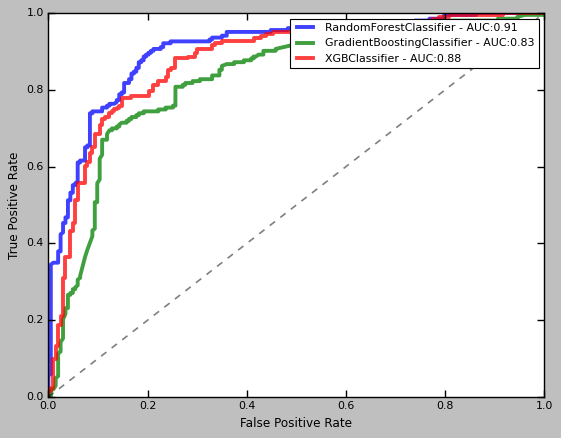

In [48]:
lw=3.5
plt.figure(figsize=(8,6))

[plt.plot(df_final['fpr'][i], df_final['tpr'][i], 
          label = f"{df_final['Name'][i]} - AUC:{df_final['roc_auc'][i]:.2f}",
          linewidth=lw, alpha=0.75) for i in range(len(df_final))]

plt.plot([0,1],[0,1],'--k', alpha=0.5)
plt.xlim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(0,1)
plt.legend()
plt.show()

# 7. Final Model 
Now, we will have to analyse and check for the final model which performs the best and has the highest F1-score.

In [49]:
df_final_melt = df_final.melt(value_vars = [
    "F1 Score", 
    "Precision", 
    "Recall", 
    "roc_auc", 
    "Accuracy"], id_vars="Name")

fig = px.bar(data_frame = df_final_melt.sort_values('value', ascending=True),
             x="variable", y="value", color="Name", barmode="group",
             color_discrete_sequence=px.colors.qualitative.Plotly,
             template = "plotly_white")
fig.show()


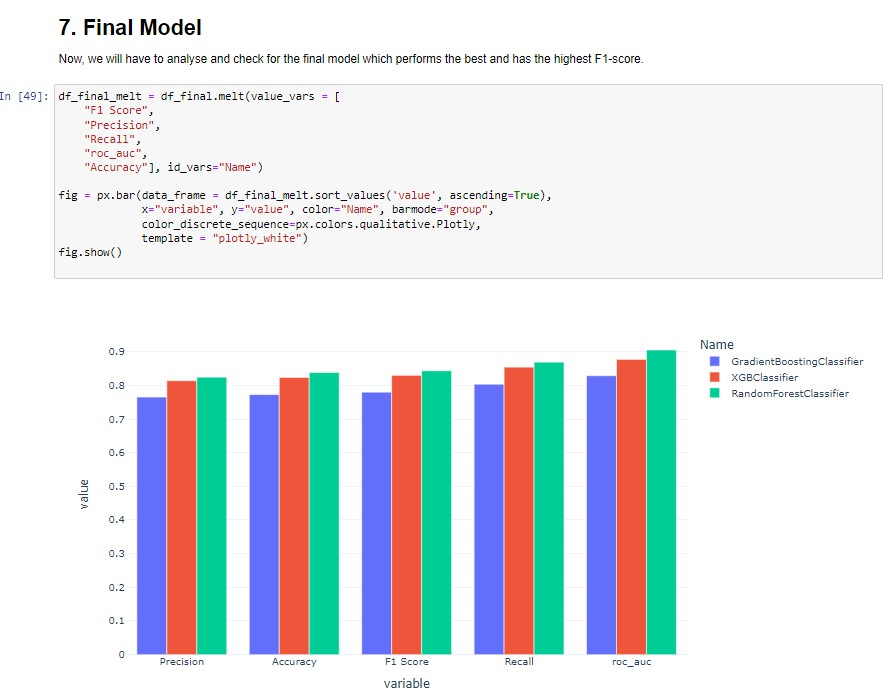

# 8. Results and Conclusion

#### - From the above results we can confidently say that Random Forest Classifier performs the best amongst all the models.
#### - The real world application of this model will mean that it should be optimised to minimize the number of false negatives predictions.
#### - The best metric to be considered is Recall (TP / TP + FN). And in our case, the Recall score is highest for the RandomForestClassifier. Also, every other metric of RandomForestClassifier is the highest.